In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. 
<p/>
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
np.random.seed(42)
#Drawing 10000 samples out of poisson distribution
n_nohitters = np.random.poisson(251/115, size = 10000)

#computing the number of samples that are 7 or larger
n_large = np.sum(n_nohitters >= 7)

#computing the probabilty of getting 7 0r more no hitters

p = n_large/len(n_nohitters)
p

0.0067

The result is about 0.007. This means although the probability is low but it is not that improbable to see a 7-or-more no-hitter season in a century

We can also model the amount of waiting time between no hitter using exponential distribution because no hitter is a rare event and it can be modeled by poisson distribution.


The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times

In [4]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

In [5]:
#using exponential distribution
np.random.seed(42)
mean_of_no_hitter_time = np.mean(nohitter_times)
samples_expon = np.random.exponential(mean_of_no_hitter_time, size = 10000)

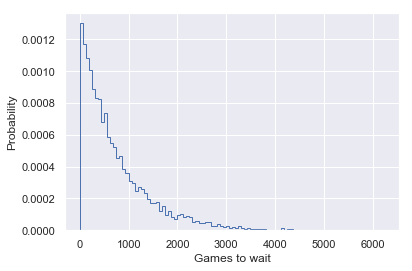

In [9]:
_ = plt.hist(samples_expon, density = True, histtype = 'step', bins = int(np.sqrt(len(samples_expon))))
_ = plt.xlabel('Games to wait')
_ = plt.ylabel('Probability')
plt.show()

We can see that there is about np.sum(samles_expon <1000)/len(samples_expon) = 73.34% chance to see a non hitter in 1000 games

Above, we have explained that we can model the waiting time between events using exponential distribution but we don't know if its true. So we will verify it by plotting the theoritical cdf with the observed cdf

In [1]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(x)
    return x,y

# for generating bootstrap replicate
def bs_replicate_1d(data, func):
    bs_rep = np.random.choice(data, size = len(data))
    return func(bs_rep)

# for generating many bootstrap replicates
def draw_bs_replicates(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bs_replicate_1d(data, func)
    return bs_replicates

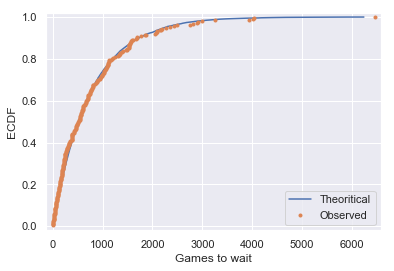

In [10]:
x_theo, y_theo = ecdf(samples_expon)
x, y = ecdf(nohitter_times)

_ = plt.plot(x_theo, y_theo)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Games to wait')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.legend(('Theoritical', 'Observed'), loc = 'lower right')
plt.show()

Since our observed data overlay the theoritical data so we can indeed model the waiting time for no hitter with exponential
distribution

## Confidence interval on the rate of no-hitters

In [18]:
np.random.seed(42)
# drawing bootstrap replicates of mean no hitter times
bs_replicates = draw_bs_replicates(nohitter_times, np.mean, size = 10000)

#Computing the 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('We are 95% confident that the mean of no hitter times lies in ', conf_int,' games.')

We are 95% confident that the mean of no hitter times lies in  [660.67280876 871.63077689]  games.
